<a href="https://colab.research.google.com/github/DhanashreeAhire/Task1_GRIP_ripo/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**

GRIP: December 2021


# **Name: Dhanashree Ahire**

**Data Science and Business Analytics Intern**

**Task 1: Prediction using Supervised Machine Learning.**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


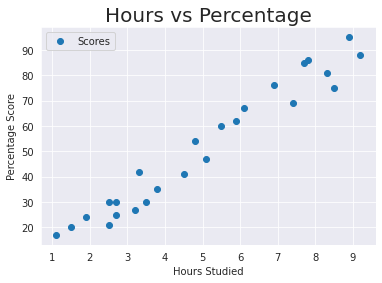

In [ ]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', size=20)  
plt.xlabel('Hours Studied', size=10)  
plt.ylabel('Percentage Score', size=10)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

We will plot a regression line to confirm the correlation.

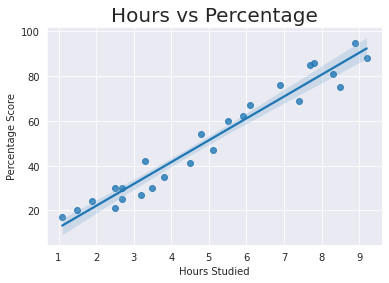

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=s_data['Hours'], y=s_data['Scores'])  
plt.title('Hours vs Percentage', size=20)  
plt.xlabel('Hours Studied', size=10)  
plt.ylabel('Percentage Score', size=10)  
plt.show()
print(s_data.corr())

Thus the positive correlation is confirm.

# **Training the Data**

In [ ]:
#difining X and y from the data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [ ]:
#Spliting
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# **Predicting**

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

prediction =pd.DataFrame({'Hours':[i[0] for i in X_test],'predicted percentage':[k for k in y_pred]})
prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Hours,predicted percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


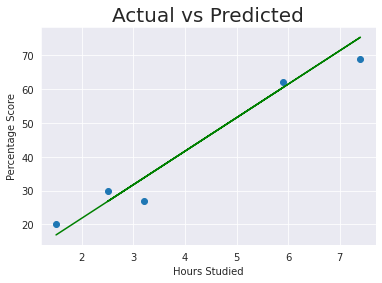

In [ ]:
#plotting the above comparison.

plt.scatter(x=X_test, y = y_test)
plt.plot(X_test, y_pred, color='green')  
plt.title('Actual vs Predicted', size=20)  
plt.xlabel('Hours Studied', size=10)  
plt.ylabel('Percentage Score', size=10)  
plt.show()

# **Evaluating the Model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# **What will be the predicted score if a student for 9.25 hrs/day?**

In [ ]:
# Testing with your own data

hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0])))

No of Hours = [9.25]
Predicted Score = 94


**According to the simple regression model if a student studies for 9.25 hrs/day ,is likely to score 
94 marks.**